In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from statsmodels.stats.diagnostic import linear_rainbow
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR



In [3]:
df=pd.read_csv('/content/tips (data for regression problem).csv')

In [4]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [5]:
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [6]:
# Separate features and target variable
features = df.drop('tip', axis=1)
target = df['tip']

# Define preprocessor for numerical and categorical columns
num_columns = ['total_bill', 'size']
cat_columns = ['sex', 'smoker', 'day', 'time']

data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first'), cat_columns)
    ])

# Define pipeline with preprocessor and Lasso regression model
pipeline_model = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('regressor', Lasso(alpha=0.1))  # Adjust alpha as needed
])

# Split data into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline_model.fit(X_train_data, y_train_data)

# Make predictions
predictions = pipeline_model.predict(X_test_data)

# Evaluate the model
mean_squared_err = mean_squared_error(y_test_data, predictions)
r_squared = r2_score(y_test_data, predictions)
print(f'Mean Squared Error: {mean_squared_err}')
print(f'R-squared: {r_squared}')

# Display coefficients for feature importance
lasso_regressor = pipeline_model.named_steps['regressor']
all_feature_names = pipeline_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_columns)
all_feature_names = num_columns + list(all_feature_names)
coefficients = lasso_regressor.coef_

# Print each feature and its coefficient
print("Feature Importance in Lasso Regression:")
for feat, coef in zip(all_feature_names, coefficients):
    print(f'{feat}: {coef}')


Mean Squared Error: 1.2176213697088816
R-squared: 0.5002528884182162
Feature Importance in Lasso Regression:
total_bill: 0.6739090355873779
size: 0.1548712460833007
sex_Male: 0.0
smoker_Yes: -0.0
day_Sat: -0.0
day_Sun: 0.0
day_Thur: -0.0
time_Lunch: -0.0


In [7]:
# Separate features and target variable
features = df.drop('tip', axis=1)
target = df['tip']

# Define preprocessor for numerical and categorical columns
num_columns = ['total_bill', 'size']
cat_columns = ['sex', 'smoker', 'day', 'time']

data_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(drop='first'), cat_columns)
    ])

# Define pipeline with preprocessor and Ridge regression model
pipeline_model = Pipeline(steps=[
    ('preprocessor', data_preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Adjust alpha as needed
])

# Split data into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline_model.fit(X_train_data, y_train_data)

# Make predictions
predictions = pipeline_model.predict(X_test_data)

# Evaluate the model
mean_squared_err = mean_squared_error(y_test_data, predictions)
r_squared = r2_score(y_test_data, predictions)
print(f'Mean Squared Error: {mean_squared_err}')
print(f'R-squared: {r_squared}')

# Display coefficients for feature importance
ridge_regressor = pipeline_model.named_steps['regressor']
all_feature_names = pipeline_model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(cat_columns)
all_feature_names = num_columns + list(all_feature_names)
coefficients = ridge_regressor.coef_

# Print each feature and its coefficient
print("Feature Importance in Ridge Regression:")
for feat, coef in zip(all_feature_names, coefficients):
    print(f'{feat}: {coef}')


Mean Squared Error: 1.1730715729929895
R-squared: 0.5185374165845096
Feature Importance in Ridge Regression:
total_bill: 0.7390493168092539
size: 0.20377392493768376
sex_Male: 0.019211197768807326
smoker_Yes: -0.050071012648003545
day_Sat: 0.07214567933002669
day_Sun: 0.13523691305876162
day_Thur: -0.029190733217017165
time_Lunch: 0.1427002121880682


In [8]:
# One-hot encode categorical variables
df_transformed = pd.get_dummies(df, drop_first=True)

# Split data into features and target
features = df_transformed.drop('tip', axis=1)
target = df_transformed['tip']

# Split data into training and test sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize features for SVR (optional for tree-based models, essential for SVR)
scaler_transform = StandardScaler()
X_train_scaled_data = scaler_transform.fit_transform(X_train_data)
X_test_scaled_data = scaler_transform.transform(X_test_data)

# Function to evaluate and display model performance
def evaluate_model(model_instance, train_features, train_target, test_features, test_target, model_label):
    model_instance.fit(train_features, train_target)
    predictions = model_instance.predict(test_features)
    root_mean_sq_error = np.sqrt(mean_squared_error(test_target, predictions))
    r_squared_value = r2_score(test_target, predictions)
    print(f"{model_label} - RMSE: {root_mean_sq_error:.2f}, R²: {r_squared_value:.2f}")

# 1. Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
evaluate_model(random_forest_model, X_train_data, y_train_data, X_test_data, y_test_data, "Random Forest Regressor")

# 2. Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
evaluate_model(decision_tree_model, X_train_data, y_train_data, X_test_data, y_test_data, "Decision Tree Regressor")

# 3. Support Vector Regressor (SVR)
svr_regression_model = SVR()
evaluate_model(svr_regression_model, X_train_scaled_data, y_train_data, X_test_scaled_data, y_test_data, "Support Vector Regressor")


Random Forest Regressor - RMSE: 1.05, R²: 0.55
Decision Tree Regressor - RMSE: 1.15, R²: 0.46
Support Vector Regressor - RMSE: 1.22, R²: 0.39



Random Forest regressor demonstrates the highest R² value and the lowest RMSE, suggesting the non-linearity of the data. Therefore, Random Forest is the most effective model for prediction.

INSIGHTS FOR MANAGEMENT

Promote Larger Groups and Higher Bills: Given that total_bill and size strongly influence tips, encouraging larger group bookings or promoting additional items such as sides or drinks could indirectly lead to higher tips.
  
Focus on Specific Days and Times: Tips are slightly higher on Sundays and during lunch hours. Management could target marketing strategies or run special promotions during these times to increase customer traffic and revenue.


In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


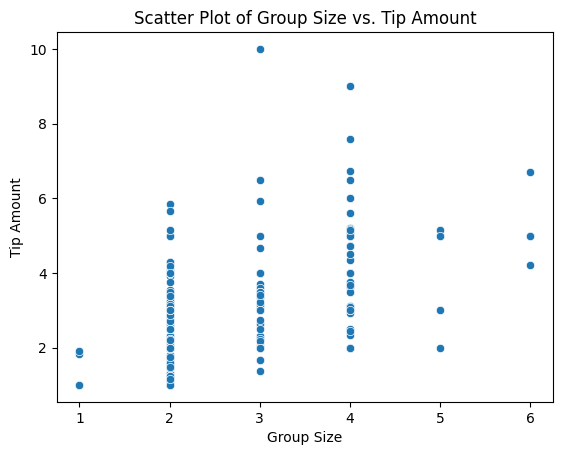

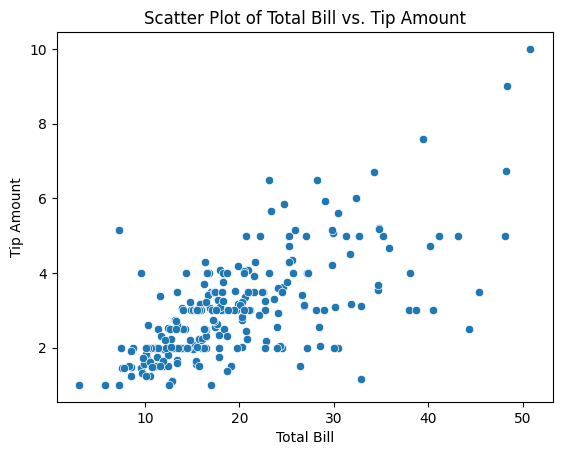

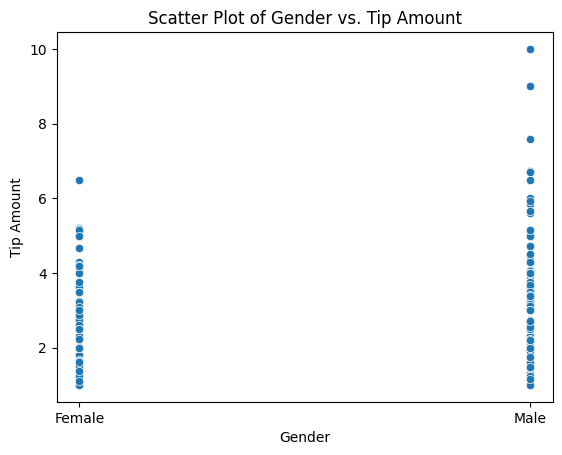

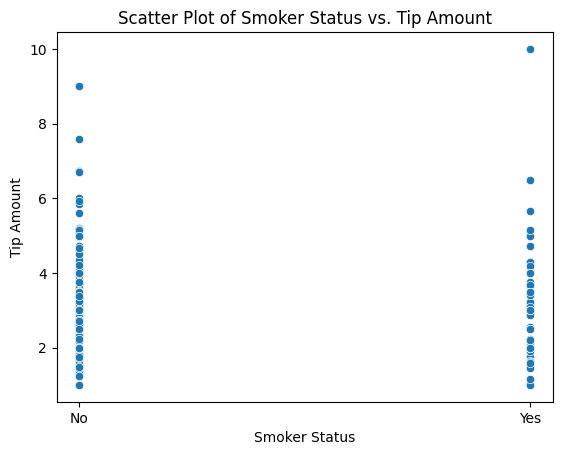

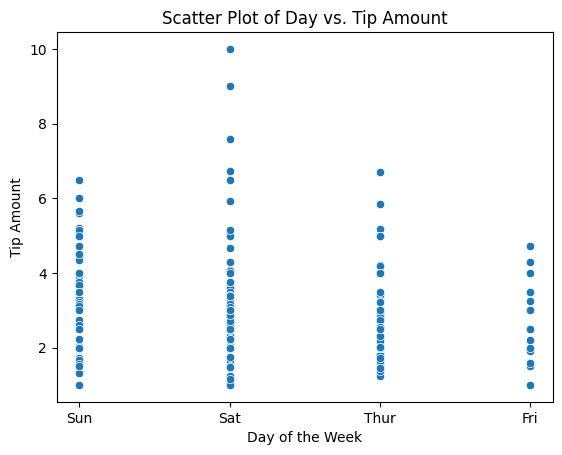

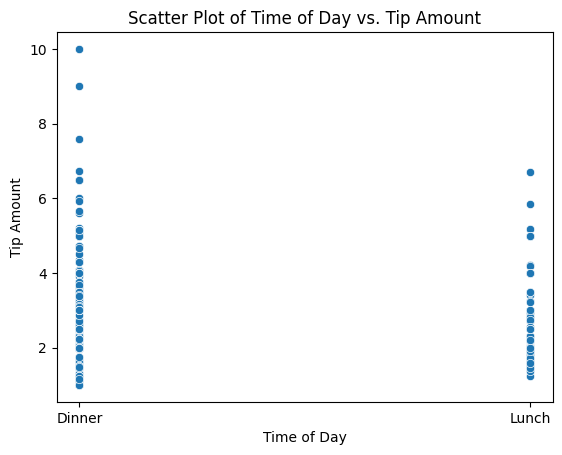

In [10]:
# Scatter plot of 'size' vs. 'tip'
sns.scatterplot(x='size', y='tip', data=df)
plt.title("Scatter Plot of Group Size vs. Tip Amount")
plt.xlabel("Group Size")
plt.ylabel("Tip Amount")
plt.show()

# Scatter plot of 'total_bill' vs. 'tip'
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title("Scatter Plot of Total Bill vs. Tip Amount")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()

# Scatter plot of 'sex' vs. 'tip'
sns.scatterplot(x='sex', y='tip', data=df)
plt.title("Scatter Plot of Gender vs. Tip Amount")
plt.xlabel("Gender")
plt.ylabel("Tip Amount")
plt.show()

# Scatter plot of 'smoker' vs. 'tip'
sns.scatterplot(x='smoker', y='tip', data=df)
plt.title("Scatter Plot of Smoker Status vs. Tip Amount")
plt.xlabel("Smoker Status")
plt.ylabel("Tip Amount")
plt.show()

# Scatter plot of 'day' vs. 'tip'
sns.scatterplot(x='day', y='tip', data=df)
plt.title("Scatter Plot of Day vs. Tip Amount")
plt.xlabel("Day of the Week")
plt.ylabel("Tip Amount")
plt.show()

# Scatter plot of 'time' vs. 'tip'
sns.scatterplot(x='time', y='tip', data=df)
plt.title("Scatter Plot of Time of Day vs. Tip Amount")
plt.xlabel("Time of Day")
plt.ylabel("Tip Amount")
plt.show()


The scatter plot reveals that only the total bill exhibits slight linearity at lower values, while the others show minimal linearity.


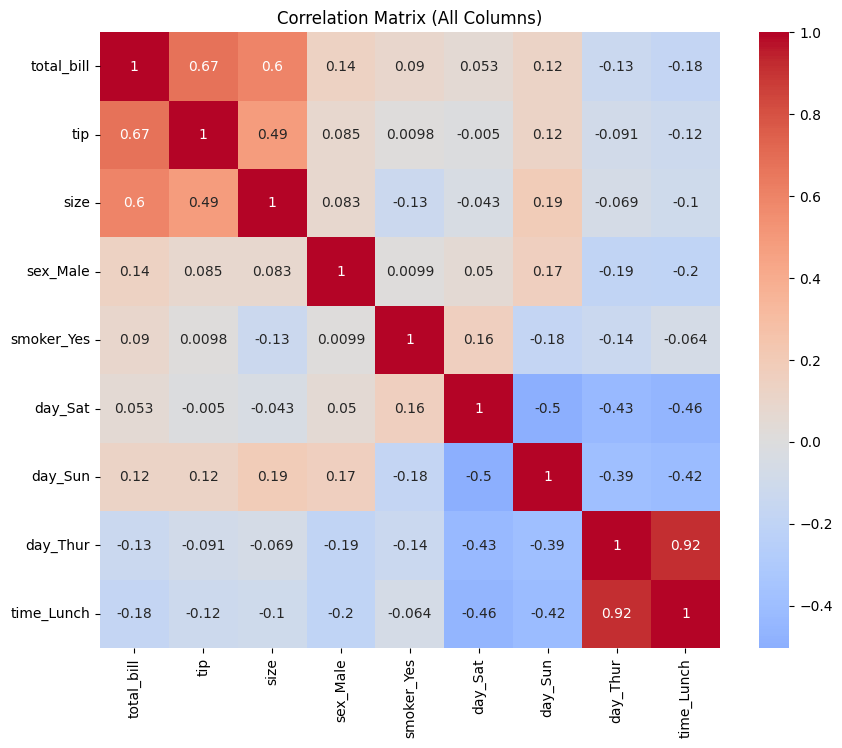

In [11]:
# One-hot encode categorical variables
df_transformed = pd.get_dummies(df, drop_first=True)

# Compute correlation matrix with all columns
correlation_matrix = df_transformed.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size if needed for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Matrix (All Columns)")
plt.show()


Total bill and size exhibit a strong correlation, particularly total bill, which accounts for the slight linearity observed in the scatter plot. Sunday and lunchtime also show some correlation, while the rest are negligible.

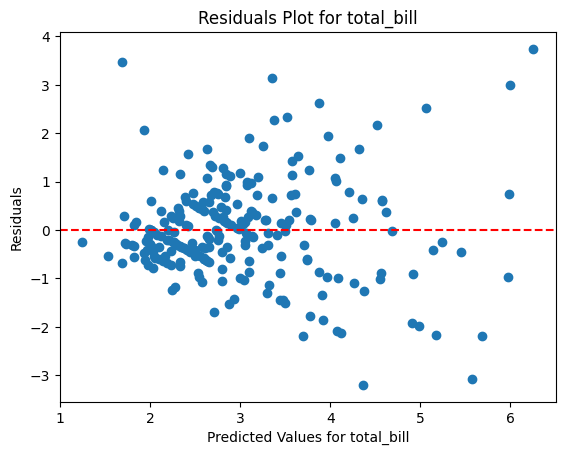

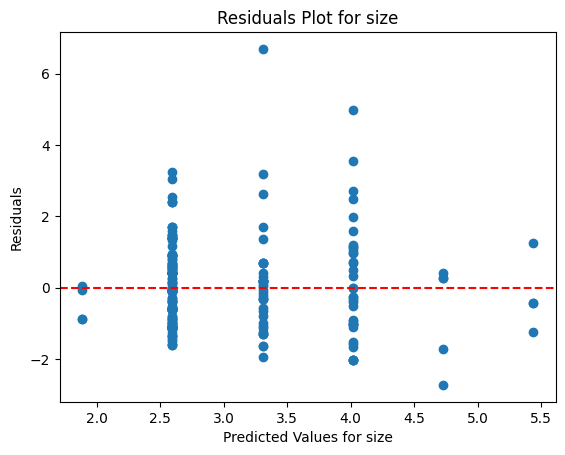

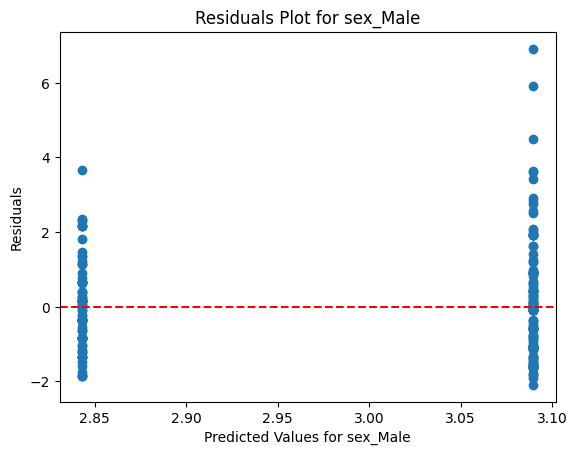

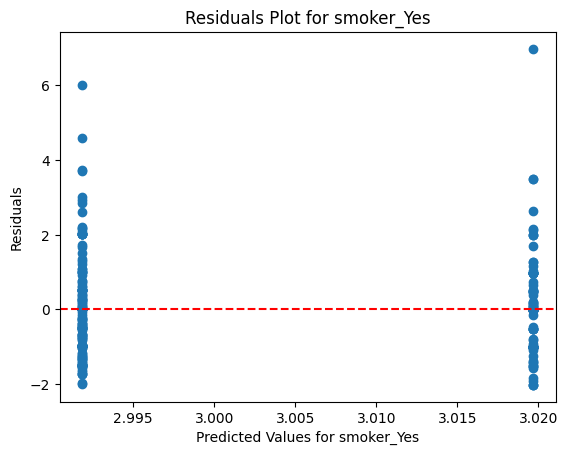

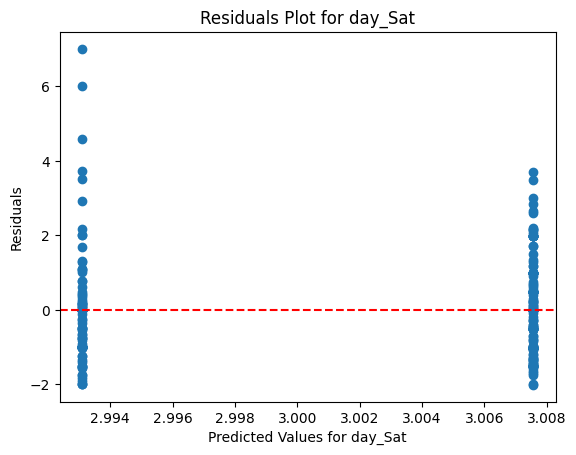

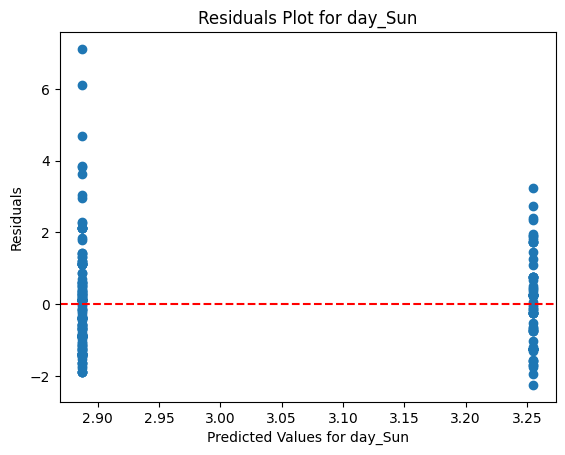

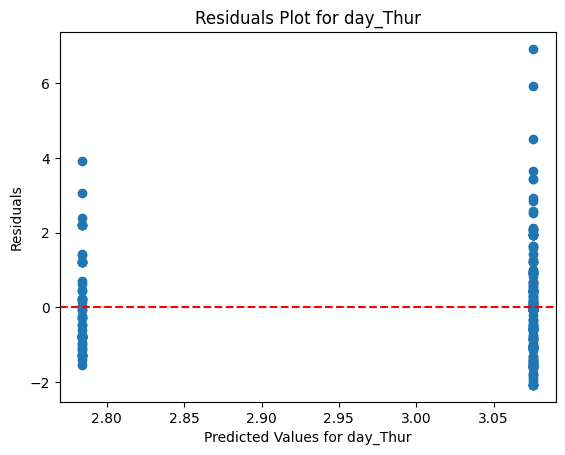

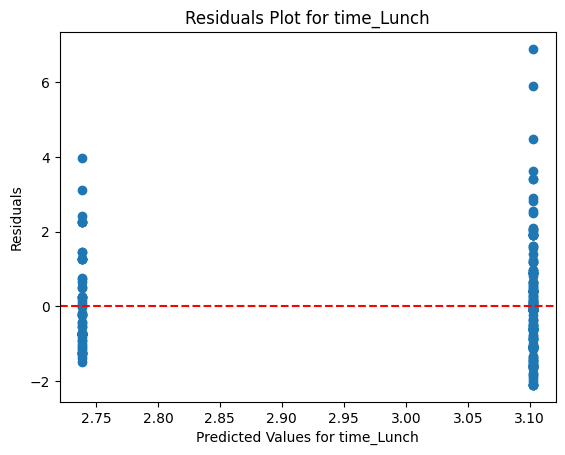

In [12]:
# One-hot encode categorical variables
df_transformed = pd.get_dummies(df, drop_first=True)

# List of columns to iterate over (all columns except 'tip')
feature_columns = df_transformed.drop('tip', axis=1).columns

# Loop through each column, fit the model and plot residuals separately
for feature in feature_columns:
    # Define the predictor and target
    predictor = df_transformed[[feature]]
    target = df_transformed['tip']

    # Fit the model
    regression_model = LinearRegression().fit(predictor, target)
    predicted_values = regression_model.predict(predictor)

    # Calculate residuals
    residuals = target - predicted_values

    # Plot residuals
    plt.scatter(predicted_values, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(f"Predicted Values for {feature}")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {feature}")
    plt.show()




Only the total bill and size display some partial linearity. This occurs at the beginning of the total bill range and in the middle range of size.The prediction accuracy of the Random Forest model is the highest, as observed above, indicating the presence of non-linearity.

